In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Wczytanie danych z CSV
kghm_df = pd.read_csv('kghm.csv', parse_dates=['Data'])
miedz_df = pd.read_csv('miedz.csv', parse_dates=['Data'])


In [4]:
# 2. Sortowanie danych po dacie (na wszelki wypadek)
kghm_df.sort_values('Data', inplace=True)
miedz_df.sort_values('Data', inplace=True)

In [ ]:
# 3. Połączenie danych po dacie
merged_df = pd.merge(kghm_df[['Data', 'Zamkniecie']], miedz_df[['Data', 'Zamkniecie']],
                     on='Data', suffixes=('_KGHM', '_Miedź'))

# 4. Ustawienie daty jako indeks
merged_df.set_index('Data', inplace=True)

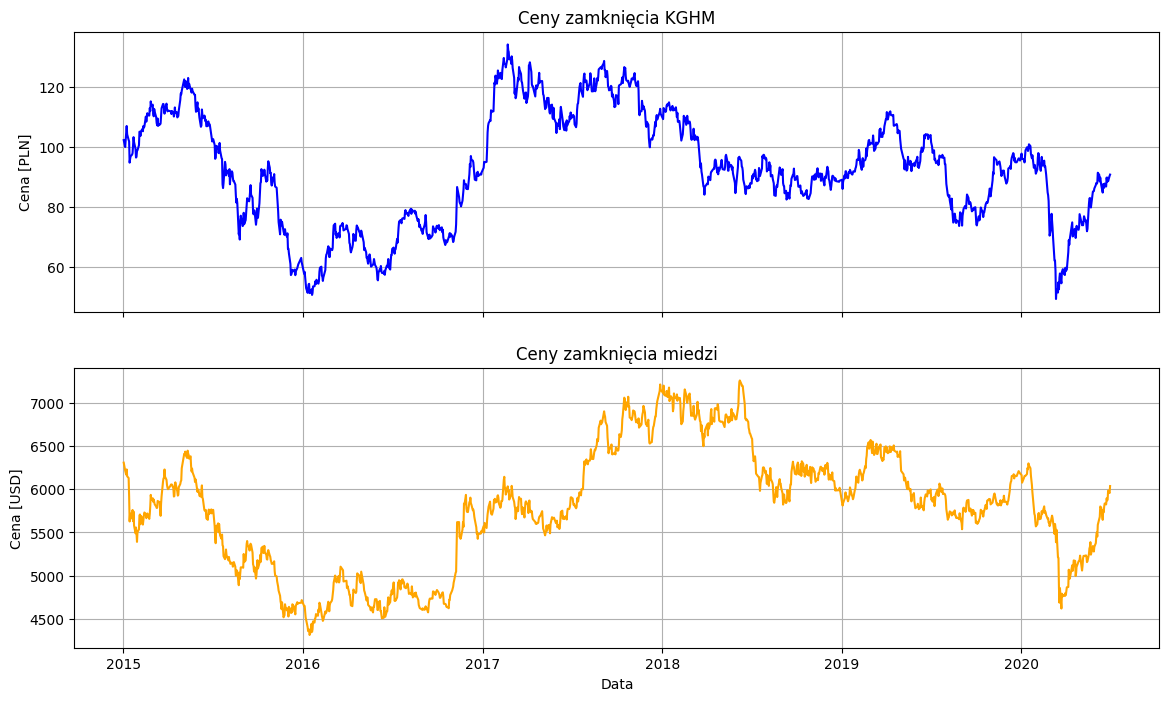

In [11]:
# 5. Tworzenie wykresów
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [2, 2]})

# Wykres KGHM
ax1.plot(merged_df.index, merged_df['Zamkniecie_KGHM'], color='blue', label='KGHM')
ax1.set_title('Ceny zamknięcia KGHM')
ax1.set_ylabel('Cena [PLN]')
ax1.grid(True)

# Wykres miedzi
ax2.plot(merged_df.index, merged_df['Zamkniecie_Miedź'], color='orange', label='Miedź')
ax2.set_title('Ceny zamknięcia miedzi')
ax2.set_ylabel('Cena [USD]')
ax2.set_xlabel('Data')
ax2.grid(True)

In [12]:
# Dodanie tabeli pod wykresami
# Pobieramy pierwsze 10 wierszy, żeby nie było za ciasno
table_data = merged_df.head(10).copy()
table_data.index = table_data.index.strftime('%Y-%m-%d')


In [13]:
# Nowa oś na potrzeby tabeli
from matplotlib.gridspec import GridSpec
fig.clear()
gs = GridSpec(3, 1, height_ratios=[2, 2, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax_table = fig.add_subplot(gs[2])

In [15]:
# Rysowanie wykresów ponownie
ax1.plot(merged_df.index, merged_df['Zamkniecie_KGHM'], color='blue')
ax1.set_title('Ceny zamknięcia KGHM')
ax1.set_ylabel('Cena [PLN]')
ax1.grid(True)

ax2.plot(merged_df.index, merged_df['Zamkniecie_Miedź'], color='orange')
ax2.set_title('Ceny zamknięcia miedzi')
ax2.set_ylabel('Cena [USD]')
ax2.set_xlabel('Data')
ax2.grid(True)


In [16]:
# Tabela z danymi
ax_table.axis('off')
table = ax_table.table(cellText=table_data.values,
                       colLabels=table_data.columns,
                       rowLabels=table_data.index,
                       cellLoc='center',
                       loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>